In [1]:
import tensorflow as tf

# 텐서플로우의 버전을 확인해봅니다.
print(tf.__version__)

# numpy 를 np 라는 이름으로 축약해서 import 합니다.
import numpy as np

2.0.0


In [2]:
#path_to_file = tf.keras.utils.get_file('input.txt', 'https://raw.githubusercontent.com/greentec/greentec.github.io/master/public/other/data/koreanhiphop/input.txt')
path_to_file2 = "./sample.txt"
path_to_file2 = "E:/Ai_projects_data/atom_data/ko_wiki_extraction/AA/wiki_00"

In [3]:
text = open(path_to_file2, 'r',encoding="UTF-8").read()#.decode(encoding='utf-8')
# 빠른 테스트를 위해 데이터 크기를 1/5 로 줄이는 옵션입니다. 
# 더 큰 크기로 테스트하면 더 좋은 결과가 나오겠지만 epoch 당 학습 시간이 많이 필요합니다.
# text = text[:len(text)//5]
# 텍스트가 총 몇 자인지 확인합니다.
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1831099 characters


In [4]:
import jamotools
# 한글과 영어가 같이 있는 부분을 임의로 발췌했습니다.
s = text[3008:3092]
print(s)
print()
# 한글 텍스트를 자모 단위로 분리해줍니다. 영어에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

이고, 양식적이라 여겨져서, 조지 발란신같은 젊은 안무가가 발레 루스와 함께 큰 진보를 했지만, 첫 번째 몇 시즌에서 절대적인 성공을 거의 얻지 못했다

ㅇㅣㄱㅗ, ㅇㅑㅇㅅㅣㄱㅈㅓㄱㅇㅣㄹㅏ ㅇㅕㄱㅕㅈㅕㅅㅓ, ㅈㅗㅈㅣ ㅂㅏㄹㄹㅏㄴㅅㅣㄴㄱㅏㅌㅇㅡㄴ ㅈㅓㄻㅇㅡㄴ ㅇㅏㄴㅁㅜㄱㅏㄱㅏ ㅂㅏㄹㄹㅔ ㄹㅜㅅㅡㅇㅘ ㅎㅏㅁㄲㅔ ㅋㅡㄴ ㅈㅣㄴㅂㅗㄹㅡㄹ ㅎㅐㅆㅈㅣㅁㅏㄴ, ㅊㅓㅅ ㅂㅓㄴㅉㅐ ㅁㅕㅊ ㅅㅣㅈㅡㄴㅇㅔㅅㅓ ㅈㅓㄹㄷㅐㅈㅓㄱㅇㅣㄴ ㅅㅓㅇㄱㅗㅇㅇㅡㄹ ㄱㅓㅇㅢ ㅇㅓㄷㅈㅣ ㅁㅗㅅㅎㅐㅆㄷㅏ


In [5]:
s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

이고, 양식적이라 여겨져서, 조지 발란신같은 젊은 안무가가 발레 루스와 함께 큰 진보를 했지만, 첫 번째 몇 시즌에서 절대적인 성공을 거의 얻지 못했다
True


In [6]:
text_jamo = jamotools.split_syllables(text)
# 자모 단위 텍스트에 존재하는 unique character 를 set 을 이용해서 뽑아내고, sorted 로 정렬합니다.
# 이 unique charater 를 보통 vocabulary 라고 합니다.
vocab = sorted(set(text_jamo))
print ('{} unique characters'.format(len(vocab)))

2006 unique characters


In [7]:
# vocab character 를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text_jamo])

In [8]:
# char2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  '$' :   5,
  '%' :   6,
  '&' :   7,
  "'" :   8,
  '(' :   9,
  ')' :  10,
  '*' :  11,
  '+' :  12,
  ',' :  13,
  '-' :  14,
  '.' :  15,
  '/' :  16,
  '0' :  17,
  '1' :  18,
  '2' :  19,
  ...
}


In [9]:
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text_jamo[210:233]), text_as_int[210:233]))

'ㅏ, ㅎㅜㅇㅝㄴㅈㅏ, ㅂㅏㄹㄹㅔ ㅎㅡㅇㅎㅐ' ---- characters mapped to int ---- > [302  13   1 301 315 294 316 276 295 302  13   1 289 302 281 281 307   1
 301 320 294 301 303]


In [10]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text_jamo)//seq_length

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
    print(i)
    print(idx2char[i.numpy()])

tf.Tensor(29, shape=(), dtype=int32)
<
tf.Tensor(68, shape=(), dtype=int32)
d
tf.Tensor(79, shape=(), dtype=int32)
o
tf.Tensor(67, shape=(), dtype=int32)
c
tf.Tensor(1, shape=(), dtype=int32)
 


In [11]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'<doc id="88201" url="https://ko.wikipedia.org/wiki?curid=88201" title="ㅅㅔㄹㅡㄱㅔㅇㅣ ㄷㅑㄱㅣㄹㄹㅔㅍㅡ">\nㅅㅔㄹㅡㄱㅔㅇㅣ '
'ㄷㅑㄱㅣㄹㄹㅔㅍㅡ\nㅅㅔㄹㅡㄱㅔㅇㅣ ㅍㅏㅂㅡㄹㄹㅗㅂㅣㅊㅣ ㄷㅑㄱㅣㄹㄹㅔㅍㅡ(, 1872ㄴㅕㄴ 3ㅇㅝㄹ 31ㅇㅣㄹ ~ 1929ㄴㅕㄴ 8ㅇㅝㄹ 19ㅇㅣㄹ)ㄴㅡㄴ ㄹㅓㅅㅣㅇㅏㅇㅢ ㅁㅣㅅㅜㄹ'
' ㅍㅕㅇㄹㅗㄴㄱㅏ, ㅎㅜㅇㅝㄴㅈㅏ, ㅂㅏㄹㄹㅔ ㅎㅡㅇㅎㅐㅇㅈㅜ, ㄱㅡㄹㅣㄱㅗ ㅁㅏㄶㅇㅡㄴ ㅇㅠㅁㅕㅇㅎㅏㄴ ㅁㅜㅇㅛㅇㅅㅜㅇㅘ ㅇㅏㄴㅁㅜㄱㅏㄷㅡㄹㅇㅣ ㄷㅟㅇㅔ ㅁㅕㅇㅅㅓㅇㅇㅡㄹ ㅇㅓㄷㄱ'
'ㅔ ㄷㅚㄴ ㅂㅏㄹㄹㅔ ㄹㅜㅅㅡㅇㅢ ㅅㅓㄹㄹㅣㅂㅈㅏㅇㅣㄷㅏ.\nㅅㅔㄹㅡㄱㅔㅇㅣ ㄷㅑㄱㅣㄹㄹㅔㅍㅡㄴㅡㄴ ㅈㅔㅈㅓㅇ ㅁㅏㄹㄱㅣㅇㅔ ㄷㅏㄷㅏㄹㅡㄹ ㅁㅜㄹㅕㅂ, ㄹㅓㅅㅣㅇㅏ ㅍㅔㄹㅡㅁㅇㅢ ㅂㅜ'
'ㅇㅠㅎㅏㄴ ㅈㅣㅂㅇㅏㄴㅇㅔㅅㅓ ㅌㅐㅇㅓㄴㅏㅆㄷㅏ. ㄱㅡㄴㅡㄴ ㅅㅜㄷㅗㄹㅗ ㅂㅗㄴㅐㅈㅕㅅㅓ ㅅㅏㅇㅌㅡㅍㅔㅌㅔㄹㅡㅂㅜㄹㅡㅋㅡ ㄷㅐㅎㅏㄱㅇㅔㅅㅓ ㅂㅓㅂㄹㅠㄹㅇㅡㄹ ㄱㅗㅇㅂㅜㅎㅏㄱㅔ ㄷㅚㅇ'


In [12]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [13]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  '<doc id="88201" url="https://ko.wikipedia.org/wiki?curid=88201" title="ㅅㅔㄹㅡㄱㅔㅇㅣ ㄷㅑㄱㅣㄹㄹㅔㅍㅡ">\nㅅㅔㄹㅡㄱㅔㅇㅣ'
Target data: 'doc id="88201" url="https://ko.wikipedia.org/wiki?curid=88201" title="ㅅㅔㄹㅡㄱㅔㅇㅣ ㄷㅑㄱㅣㄹㄹㅔㅍㅡ">\nㅅㅔㄹㅡㄱㅔㅇㅣ '


In [14]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 29 ('<')
  expected output: 68 ('d')
Step    1
  input: 68 ('d')
  expected output: 79 ('o')
Step    2
  input: 79 ('o')
  expected output: 67 ('c')
Step    3
  input: 67 ('c')
  expected output: 1 (' ')
Step    4
  input: 1 (' ')
  expected output: 73 ('i')


In [15]:
# Batch size
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch//BATCH_SIZE

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int32, tf.int32)>

In [16]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), embedding_dim,
                              batch_input_shape=[BATCH_SIZE, None]),
    tf.keras.layers.GRU(rnn_units,
        return_sequences=True,
        recurrent_initializer='glorot_uniform',
        stateful=True),
    tf.keras.layers.Dense(vocab_size)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           513536    
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 2006)          2056150   
Total params: 6,507,990
Trainable params: 6,507,990
Non-trainable params: 0
_________________________________________________________________


In [18]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 2006) # (batch_size, sequence_length, vocab_size)


In [19]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [20]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = loss)

In [21]:
import os
# 모델의 체크포인트가 저장될 디렉토리 이름입니다.
checkpoint_dir = './training_checkpoints'

# 체크포인트 파일은 아래에서 지정하는 ckpt_{epoch} 형태로 접두사를 달게 됩니다. 즉 ckpt_5, ckpt_10, ... 이 됩니다.
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

# 체크포인트 콜백은 model.fit 을 실행할 때 호출됩니다. period 는 저장 주기입니다.
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,
    period=1)

In [22]:
EPOCHS = 10

In [23]:
# 모델을 실제로 학습시킵니다.
# 진행 막대를 표시하지 않기 위해서 verbose=2 로 설정합니다. (0 = 표시없음, 1 = 진행막대 표시)
history = model.fit(dataset.repeat(), epochs=EPOCHS, steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_callback], verbose=2)

Train for 549 steps
Epoch 1/10
549/549 - 44s - loss: 2.3734
Epoch 2/10
549/549 - 41s - loss: 1.9201
Epoch 3/10
549/549 - 41s - loss: 1.8114
Epoch 4/10
549/549 - 40s - loss: 1.7548
Epoch 5/10
549/549 - 40s - loss: 1.7153
Epoch 6/10
549/549 - 41s - loss: 1.6872
Epoch 7/10
549/549 - 41s - loss: 1.6650
Epoch 8/10
549/549 - 40s - loss: 1.6451
Epoch 9/10
549/549 - 39s - loss: 1.6285
Epoch 10/10
549/549 - 39s - loss: 1.6134


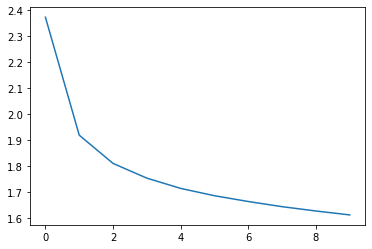

In [24]:
import matplotlib.pyplot as plt

# 위에서 history 라는 이름으로 저장했던 변수에 있는 loss 정보를 꺾은선 그래프로 그립니다.
plt.plot(history.history['loss'])

# plt.show() 함수를 호출해야 위에서 그린 그래프가 출력에 나타납니다.
plt.show()

In [25]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints\\ckpt_10'

In [26]:
gen_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), embedding_dim,
                              batch_input_shape=[1, None]),
    tf.keras.layers.GRU(rnn_units,
        return_sequences=True,
        recurrent_initializer='glorot_uniform',
        stateful=True),
    tf.keras.layers.Dense(vocab_size)
])

# 최신의 체크포인트에서 weights 를 불러옵니다.
gen_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

# 가장 loss 가 낮은 weights 를 불러옵니다.
min_loss = min(history.history['loss'])
index = history.history['loss'].index(min_loss)
print(min_loss, index)
gen_model.load_weights('./training_checkpoints/ckpt_' + str(index+1))

# build() 함수로 모델을 사용할 수 있도록 만듭니다. build() 함수를 사용할 때는 인수로 input_shape 을 같이 써줘야 합니다.
gen_model.build(tf.TensorShape([1, None]))

# gen_model의 구조를 출력합니다.
gen_model.summary()

1.6134416364364068 9
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            513536    
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_1 (Dense)              (1, None, 2006)           2056150   
Total params: 6,507,990
Trainable params: 6,507,990
Non-trainable params: 0
_________________________________________________________________


In [27]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated_jamo = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a multinomial distribution to predict the word returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted word as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated_jamo.append(idx2char[predicted_id])
      
  text_generated = jamotools.join_jamos(''.join(text_generated_jamo))

  return (jamotools.join_jamos(start_string) + text_generated)

In [28]:
# print(generate_text(gen_model, start_string=u"ㄴㅐㄱㅏ ㅈㅔㅇㅣㄹ "))
print(generate_text(gen_model, start_string=u"ㅈㅏㅁㅇㅡㄴ ㅇㅏㄴㅇㅗㄱㅗ "))
# print(generate_text(gen_model, start_string=u"ㅇㅗㄴㅡㄹ ㅂㅏㅁㅇㅡㄴ "))

잠은 안오고 피로무로 줄가 썼는데, 그 1권에서, 한국화된다. 떠항품 싸쿰 관련은 류장으로 쓰이는 연재로 남학생위 황제(네토를 멸의 산동에 있겠다. 또한 자버작시코, 집원으로 SBS, New Gerle intar ungensang hankexpand, Davorlnust irler adia.org/wikipedia.org/wiki?curid=88566" title="하무〉의 사실》에 지배층관도 수상방치에서, 신피로 욘성후는 태안 해병사!ㅃ里면 악시코에서 민(覇漢), 《신의리주]로 1분이라노라 기완이 춛었으나 그리스투에서 주파 습스의 수 있었지만 변지를 끄저본으로써 당지를 이늡하 물리탄스와 뮤양상의 지제데 ㅆ는 서울과 거태수일건의 노래로 독력하였다.
가도문니 문쟁콘사키아군
863만부 양품은 “덕의해 불표되어 있었다.
1189년에는 아울이 능도체 강화물리면 등을 그해서 붓머구며, 존 등과 견보항이산이다.
9월 1일, 토면에 있게 된다. 약 3랴튼 대표’, 이료장에서는 지채를 일전하지 모쇼수와 눈 구술릭서키의 조정사관 등 172어국적이며, 부사를 번교 선고부, 폄위원회에도 돌아났다.
</doc>
<doc id="87439" u
